# Análise Estatística de Negócio

Segue aqui um projeto de Análise de dados, de bancos de dados com informações sobre a venda de uma loja online.

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Matplotlib para desfrutar da vizualização gráfica dos dados
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Seaborn como complemento ao matplotlib

In [1]:
import pandas as pd
import matplotlib as plot
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataframes

## Importando Dataframes

### Descrição dos dados:

#### Visits:

- Device: Tipo de dispositivo usado.

- End Ts: Data e hora do final da sessão.

- Source Id: Identificador da origem de anúncio.

- Start Ts: Data e hora do início da sessão.

- Uid: Identificador unívoco do usuário.

#### Orders:

- Buy Ts: Data e hora do pedido.

- Revenue: A receita da Y.Afisha com o pedido.

- Uid: Identificador unívoco do usuário.

#### Costs:

- Source Id: Identificador da origem de anúncio.

- Dt: Data.

- Costs: Despesas com esta origem de anúncio neste dia.

In [2]:
visits=pd.read_csv('/datasets/visits_log_us.csv')
orders=pd.read_csv('/datasets/orders_log_us.csv')
costs=pd.read_csv('/datasets/costs_us.csv')

In [3]:
def analise_geral(df):
    df.info()
    df.head()
    df.describe()

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [12]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


# Explorando os dados iniciais

    Conforme analisado as informações das tabelas, pode-se concluir que é necessário:
- Definir como tipo 'datetime' as colunas start_ts, end_ts, buy_ts, dt.
- Corrigir os nome das colunas.

In [13]:
visits.columns=visits.columns.str.lower().str.replace(' ', '_')

In [14]:
orders.columns=orders.columns.str.lower().str.replace(' ', '_')

In [15]:
visits.start_ts=pd.to_datetime(visits.start_ts, format='%Y-%m-%d %H:%M:%S')

In [16]:
visits.end_ts=pd.to_datetime(visits.end_ts, format='%Y-%m-%d %H:%M:%S')

In [17]:
orders.buy_ts=pd.to_datetime(orders.buy_ts, format='%Y-%m-%d %H:%M:%S')

In [18]:
costs.dt=pd.to_datetime(costs.dt, format='%Y-%m-%d')

# Relatório de Vendas

In [19]:
#Agrupando dados das visitas iniciais.
first_visit_datetime=visits.groupby('uid')['start_ts'].min()

In [20]:
# Seprando as visitas por medida de tempo.
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

C:\Users\gabri\AppData\Local\Temp\ipykernel_8300\3514480796.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  visits['session_week'] = visits['start_ts'].dt.week


In [21]:
#Calculando visitas por mês.
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

In [22]:
#Calculando visitas por dia.
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

In [23]:
#Calculando visitas por mês.
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

- Quantas pessoas usam-no cada dia, semana e mês?

In [24]:
print("Quantidade de usuários médios por dia:", int(dau_total))
print("Quantidade de usuários médios por semana:", int(wau_total))
print("Quantidade de usuários médios por mês:", int(mau_total))

Quantidade de usuários médios por dia: 907
Quantidade de usuários médios por semana: 5716
Quantidade de usuários médios por mês: 23228


- Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).

In [25]:
print("Há em média por dia:",int(visits.groupby('session_date').agg({'uid': 'count'}).mean()), 'sessões.')

Há em média por dia: 987 sessões.


- Que comprimento tem cada sessão? 

In [26]:
visits['session_duration_sec'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

In [27]:
visits.describe()

,source_id,uid,session_year,session_month,session_week,session_duration_sec
count,359400.000000,3.594000e+05,359400.000000,359400.000000,359400.000000,359400.000000
mean,3.750515,9.202557e+18,2017.453395,6.616274,26.970907,643.506489
std,1.917116,5.298433e+18,0.497824,3.855768,16.773920,1016.334786
min,1.000000,1.186350e+13,2017.000000,1.000000,1.000000,0.000000
25%,3.000000,4.613407e+18,2017.000000,3.000000,11.000000,120.000000
50%,4.000000,9.227413e+18,2017.000000,7.000000,26.000000,300.000000
75%,5.000000,1.372824e+19,2018.000000,10.000000,43.000000,840.000000
max,10.000000,1.844668e+19,2018.000000,12.000000,52.000000,84480.000000


In [28]:
asl=(visits['session_duration_sec'].median()) 
print(asl)

300.0


A mediana de tempo das sessões é 5 minutos.

- Com que frequência os usuários voltam?

In [29]:
retention=dau_total/mau_total*100 
retention
# 3% voltam no mesmo mês

uid    3.90897
dtype: float64

In [30]:
retention=dau_total/wau_total*100 
print(retention)
# 15% Voltam

uid    15.884409
dtype: float64


3% Voltam no mesmo mês

15% Voltam na mesma semana

# Vendas

## Primeira sessão

In [31]:
#Quando começam a comprar?
first_session=visits.groupby('uid')['start_ts'].min()


In [32]:
orders=orders.join(first_session, on='uid')


In [33]:
orders

,buy_ts,revenue,uid,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00


In [34]:
orders['conversion']=visits.start_ts-orders['buy_ts'].min()

# Primeira compra

In [35]:
first_orders=orders.groupby('uid')['buy_ts'].min()

In [36]:
orders

,buy_ts,revenue,uid,start_ts,conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00


In [37]:
orders['time_buy']=orders.buy_ts-orders.start_ts

In [38]:
orders

,buy_ts,revenue,uid,start_ts,conversion,time_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00,0 days 00:27:00
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00,0 days 14:39:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00,0 days 00:45:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00,0 days 00:02:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00,220 days 11:24:00


In [39]:
orders['time_buy'].median()
#Mediana de tempo para fazer a primeira compra

Timedelta('0 days 03:26:00')

In [40]:
orders['days']=orders['buy_ts'].astype('datetime64[D]')-orders['start_ts'].astype('datetime64[D]')

In [41]:
days_group=orders.groupby(orders['days']).agg({'uid':'nunique'}).reset_index()

In [42]:
days_group['%']=days_group['uid']/days_group['uid'].sum()*100

In [43]:
days_group

,days,uid,%
0,0 days,25039,53.791785
1,1 days,2425,5.209676
2,2 days,954,2.049497
3,3 days,623,1.338403
4,4 days,546,1.172983
...,...,...,...
360,360 days,1,0.002148
361,361 days,1,0.002148
362,362 days,2,0.004297
363,363 days,7,0.015038


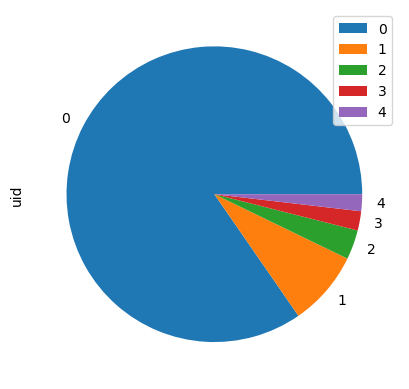

In [44]:
days_group.head().plot(kind='pie', y='uid')
plt.title=('Registro x Pedido')
sns.despine()

A grande maioria dos clientes compra o primeiro produto no dia do cadastro.

## Relação cadastro e compra:

- Provavelmente os clientes da Y.alfafish realizam o cadastro para fazer a primeira compra, já que uma grande porcentagem demora apenas 3 minutos e meio para fazer a primeira compra.

In [45]:
order_per_month=orders
first_orders = orders.groupby('uid')['buy_ts'].min()
first_orders.name='first_order'
order_per_month=order_per_month.join(first_orders, on='uid')
#isolando tipo de tempo para primeira compra
order_per_month['first_order']=order_per_month['first_order'].astype('datetime64[M]')
order_per_month['order_month']=order_per_month['buy_ts'].astype('datetime64[M]')
#order_per_month['order_month']=order_per_month['order_month'].astype('datetime64[M]')

# Isolando para todos os tempos

In [46]:
order_per_month

,buy_ts,revenue,uid,start_ts,conversion,time_buy,days,first_order,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00,0 days 00:01:00,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00,0 days 00:11:00,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00,0 days 00:02:00,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00,0 days 00:15:00,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00,0 days 00:27:00,0 days,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00,0 days 14:39:00,0 days,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00,0 days 00:45:00,0 days,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00,0 days 00:02:00,0 days,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00,220 days 11:24:00,220 days,2018-05-01,2018-05-01


# Calculando meses com mais vendas

In [47]:
# Contando pedidos por usuários.
order_user=order_per_month.groupby(['first_order','order_month']).agg({'uid':'nunique','revenue':'count'})
order_user=order_user.rename(columns={'uid': 'users_count', 'revenue':'orders_count'})


In [48]:
order_per_month

,buy_ts,revenue,uid,start_ts,conversion,time_buy,days,first_order,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00,0 days 00:01:00,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00,0 days 00:11:00,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00,0 days 00:02:00,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00,0 days 00:15:00,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00,0 days 00:27:00,0 days,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00,0 days 14:39:00,0 days,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00,0 days 00:45:00,0 days,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00,0 days 00:02:00,0 days,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00,220 days 11:24:00,220 days,2018-05-01,2018-05-01


In [49]:
order_user.head()

users_count  orders_count
first_order order_month                           
2017-06-01  2017-06-01          2023          2354
            2017-07-01            61           177
            2017-08-01            50           174
            2017-09-01            54           226
            2017-10-01            88           292

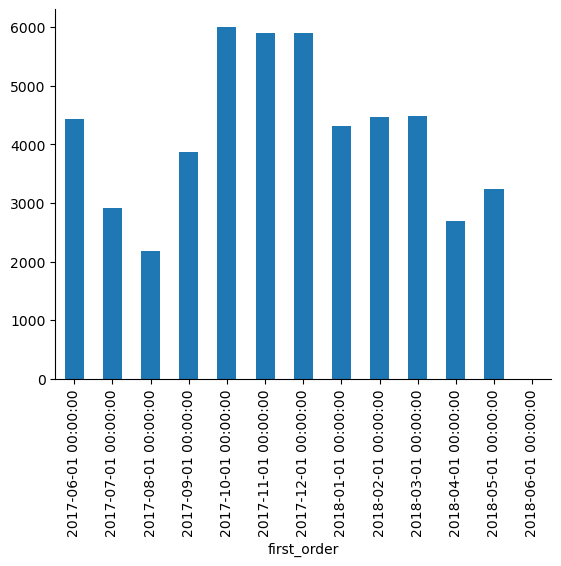

In [50]:
order_per_month.groupby('first_order')['uid'].count().plot(kind='bar')
order_per_month['first_order']=order_per_month.first_order.dt.date
sns.despine()
# Coletar apenas o mês do gráfico e modificar o eixo.


#### É perceptível um aumento significativo no 5°, 6° e 7° meses do gráfico de barras.

## Encontrando gráfico de calor para coorte de compras por mês dos usuários.

In [51]:
order_user['order_x_user']=order_user['orders_count']/order_user['users_count']

In [52]:
order_user

users_count  orders_count  order_x_user
first_order order_month                                         
2017-06-01  2017-06-01          2023          2354      1.163618
            2017-07-01            61           177      2.901639
            2017-08-01            50           174      3.480000
            2017-09-01            54           226      4.185185
            2017-10-01            88           292      3.318182
...                              ...           ...           ...
2018-03-01  2018-05-01            58           176      3.034483
2018-04-01  2018-04-01          2276          2495      1.096221
            2018-05-01            69           195      2.826087
2018-05-01  2018-05-01          2988          3249      1.087349
2018-06-01  2018-06-01             1             1      1.000000

[79 rows x 3 columns]

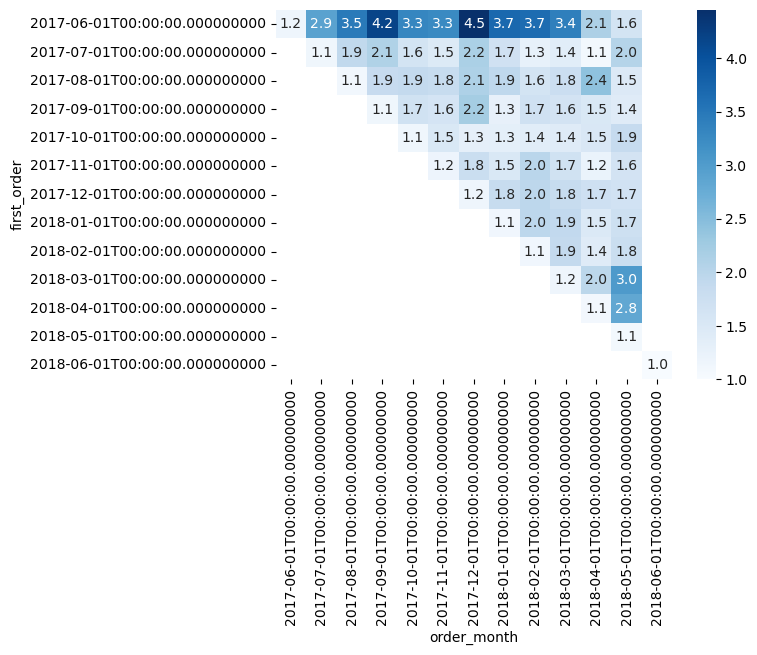

In [53]:
#Encontrando médias
order_user['orders_x_users']=order_user['orders_count']/order_user['users_count']
groupup= order_user.pivot_table(index='first_order', columns='order_month', values='orders_x_users')
groupup.fillna('')
sns.heatmap(
groupup, 
annot=True,
cmap='Blues',
fmt='.1f'
)
order_user=order_user.reset_index()

### No primeiro mês o usuário faz apenas uma compra, pode ser que ele apenas esteja testando a plataforma para fazer mais compras futuramente.

In [54]:
order_user['order_month']=order_user['order_month'].astype('datetime64[M]')

In [55]:
order_user['orders_x_users'].mean()

1.8589644143998318

In [56]:
orders

,buy_ts,revenue,uid,start_ts,conversion,time_buy,days
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00,0 days 00:01:00,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00,0 days 00:11:00,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00,0 days 00:02:00,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00,0 days 00:15:00,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00,0 days 00:27:00,0 days
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00,0 days 14:39:00,0 days
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00,0 days 00:45:00,0 days
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00,0 days 00:02:00,0 days
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00,220 days 11:24:00,220 days


In [57]:
orders['month']=orders['buy_ts'].astype('datetime64[M]')

# Volume da compra

In [58]:
orders

,buy_ts,revenue,uid,start_ts,conversion,time_buy,days,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00,0 days 00:01:00,0 days,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00,0 days 00:11:00,0 days,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00,0 days 00:02:00,0 days,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00,0 days 00:15:00,0 days,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00,0 days 00:27:00,0 days,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00,0 days 14:39:00,0 days,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00,0 days 00:45:00,0 days,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00,0 days 00:02:00,0 days,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00,220 days 11:24:00,220 days,2018-05-01


In [59]:
order_per_month

,buy_ts,revenue,uid,start_ts,conversion,time_buy,days,first_order,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,202 days 17:10:00,0 days 00:01:00,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,263 days 16:43:00,0 days 00:11:00,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,30 days 01:44:00,0 days 00:02:00,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,353 days 10:49:00,0 days 00:15:00,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,209 days 13:56:00,0 days 00:27:00,0 days,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,3 days 18:37:00,0 days 14:39:00,0 days,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,131 days 16:50:00,0 days 00:45:00,0 days,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,317 days 19:39:00,0 days 00:02:00,0 days,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,137 days 22:05:00,220 days 11:24:00,220 days,2018-05-01,2018-05-01


In [60]:
monthly_orders = (
    order_per_month.groupby(['buy_ts', 'first_order']).agg({'revenue':'sum', 'uid':'nunique'}))
monthly_orders=monthly_orders.reset_index()

In [61]:
monthly_orders=monthly_orders.rename(columns={'first_order':'first_order_month'})

In [62]:
monthly_orders['revenue'].mean()

5.332399669973913

In [63]:
monthly_orders['order_month']=monthly_orders['buy_ts'].astype('datetime64[M]')

O volume médio de compras é: 5.48057663455887


In [64]:
month_revenue=monthly_orders

<AxesSubplot:title={'center':'Volume de compras por mês'}, xlabel='order_month'>

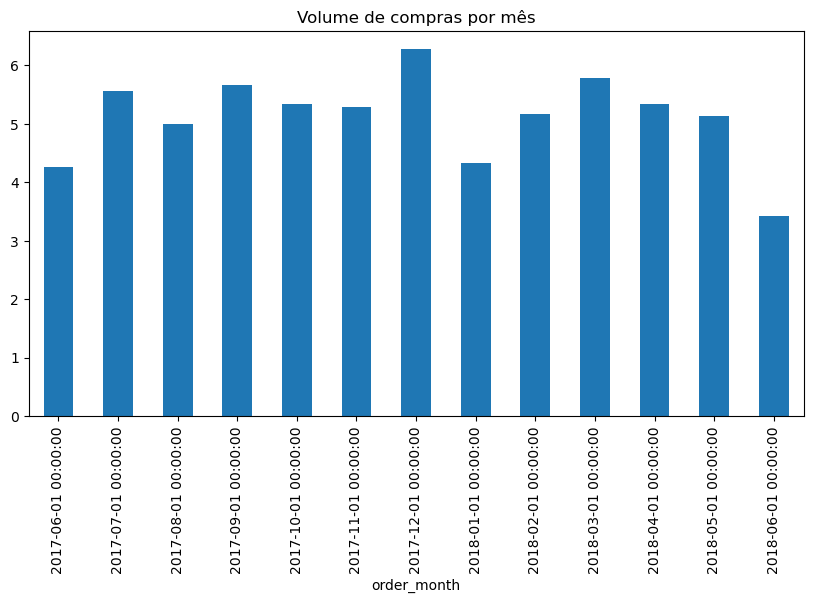

In [65]:
month_revenue.groupby('order_month')['revenue'].mean().plot(kind='bar', figsize=(10,5), title='Volume de compras por mês')


Não há diferença significativa entre o volume de compras entre os meses.

In [66]:
month_revenue=month_revenue.rename(columns={'first_order_month':'first_order'})

In [67]:
#Formatando valores para criar um heat_map.
cohort_sizes = month_revenue.groupby(['first_order', 'order_month']).agg({'revenue': 'mean'}).reset_index().round()
cohort_sizes.first_order=cohort_sizes['first_order'].astype('datetime64[M]')
cohort_sizes.order_month=cohort_sizes['order_month'].astype('datetime64[M]')

cohort_sizes.head()

,first_order,order_month,revenue
0,2017-06-01,2017-06-01,4.0
1,2017-06-01,2017-07-01,6.0
2,2017-06-01,2017-08-01,5.0
3,2017-06-01,2017-09-01,9.0
4,2017-06-01,2017-10-01,7.0


# Coortes compras por usuários

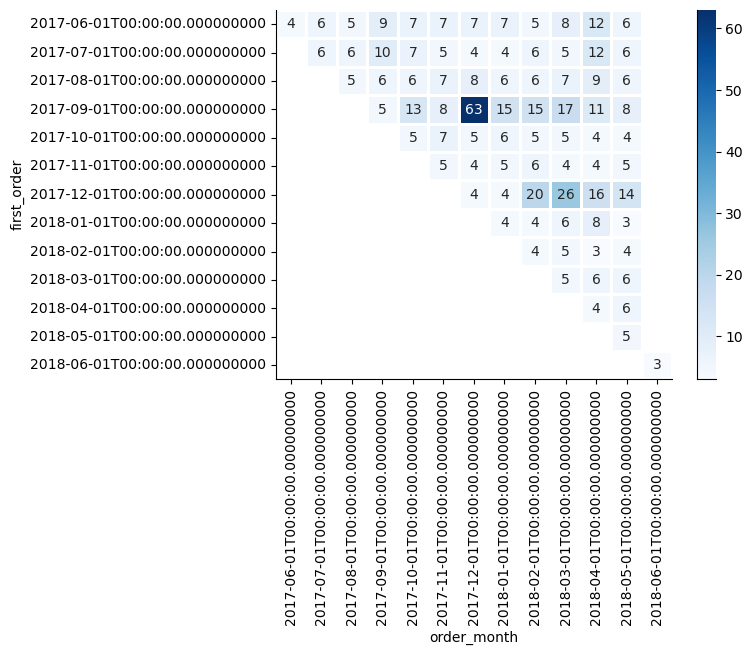

In [68]:
heat_revenue=cohort_sizes.pivot_table(index='first_order', columns='order_month', values='revenue').round(2)
heat_revenue.fillna('')
sns.heatmap(heat_revenue, annot=True, linewidths=1, cmap='Blues',)
sns.despine()

#### Os usuários que se cadastraram em outubro compraram significativamente mais em janeiro, a promoção ou os motivos que os levaram a comprar tanto devem ser estudados para serem reproduzidos aumentando a quantidade de compras.

# CALCULANDO LTV (

In [69]:
#Conhtando usuários e somando receitas.
uid_cohortrs=monthly_orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
#Renomeando
uid_cohortrs=uid_cohortrs.rename(columns={'uid':'users_count'})
# Juntando a quantidade as informações.
ltv_cohorts=pd.merge(monthly_orders, uid_cohortrs, on='first_order_month')
# Calculando a receita de cada mês por Coorte
cohorts_revenue=monthly_orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_revenue=cohorts_revenue.rename(columns={'revenue':'cohorte_revenue'})

# Juntando as informações a tabela principal (monthly_orders)
ltv_cohorts=ltv_cohorts.merge(cohorts_revenue, on=['first_order_month', 'order_month'])
#Calculando Ltv
ltv_cohorts['ltv']=ltv_cohorts['cohorte_revenue']/ltv_cohorts['users_count']
#Alterando tipo de dados para poder fazer a subtração e calcular tempo de coorte.

ltv_cohorts['ltv']=ltv_cohorts['cohorte_revenue']/ltv_cohorts['users_count']
#Incluindo uma coluna com a informação de quantidade de meses da corte.
ltv_cohorts['order_month']=ltv_cohorts['order_month'].astype('datetime64[M]')
ltv_cohorts['first_order_month']=ltv_cohorts['first_order_month'].astype('datetime64[M]')

ltv_cohorts['months']=(ltv_cohorts['order_month']-ltv_cohorts['first_order_month'])/np.timedelta64(1, 'M')
ltv_cohorts['months']=ltv_cohorts['months'].round().astype('int')

#Alterando o tipo de dados para facilitar a vizualização
ltv_cohorts['first_order_month']=ltv_cohorts['first_order_month'].dt.date


ltv_cohorts.tail()

,buy_ts,first_order_month,revenue,uid,order_month,users_count,cohorte_revenue,ltv,months
47264,2018-05-31 23:43:00,2018-05-01,3.67,1,2018-05-01,8,13925.76,1740.72,0
47265,2018-05-31 23:50:00,2018-05-01,10.44,2,2018-05-01,8,13925.76,1740.72,0
47266,2018-05-31 23:54:00,2018-05-01,0.30,1,2018-05-01,8,13925.76,1740.72,0
47267,2018-05-31 23:56:00,2018-05-01,3.67,1,2018-05-01,8,13925.76,1740.72,0
47268,2018-06-01 00:02:00,2018-06-01,3.42,1,2018-06-01,1,3.42,3.42,0


In [70]:
ltv_cohorts['first_order_month'] = ltv_cohorts['first_order_month'].astype('datetime64[M]')
# Formatando tipo de first_order_month

In [71]:
ltv_cohorts.describe()

,revenue,uid,users_count,cohorte_revenue,ltv,months
count,47269.000000,47269.000000,47269.000000,47269.000000,47269.000000,47269.00000
mean,5.332400,1.066555,4.259028,13371.269708,3421.390540,0.66496
std,22.574063,0.282288,1.833584,6941.104531,1970.015035,1.76668
min,0.000000,1.000000,1.000000,3.420000,3.420000,0.00000
25%,1.340000,1.000000,3.000000,9557.490000,2409.610000,0.00000
50%,2.750000,1.000000,3.000000,14568.530000,3533.563333,0.00000
75%,5.500000,1.000000,5.000000,20767.490000,4856.176667,0.00000
max,2633.280000,8.000000,8.000000,21716.200000,6922.496667,11.00000


- O lucro bruto médio adquirido agrupado mensalmente é 3421.

# Marketing 

In [72]:
costs['month']=costs['dt'].astype('datetime64[M]')

In [73]:
#Agrupo os gastos por mês e ano.
cost_month=costs.groupby(['month'])['costs'].sum()

<AxesSubplot:xlabel='month'>

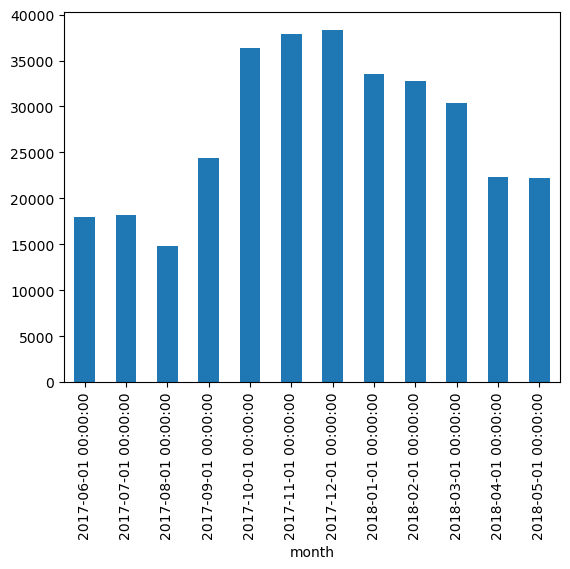

In [74]:
cost_month.plot(kind='bar')
#Custo do marketing

# CUSTOS POR ORIGEM

In [75]:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


<AxesSubplot:xlabel='source_id'>

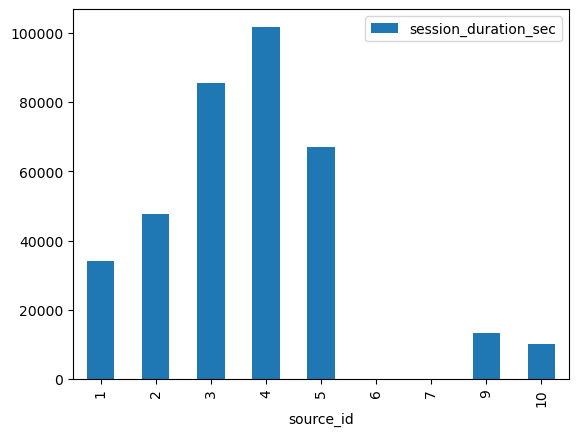

In [76]:
visits.groupby('source_id').count().plot(y='session_duration_sec', kind='bar')

<AxesSubplot:xlabel='device'>

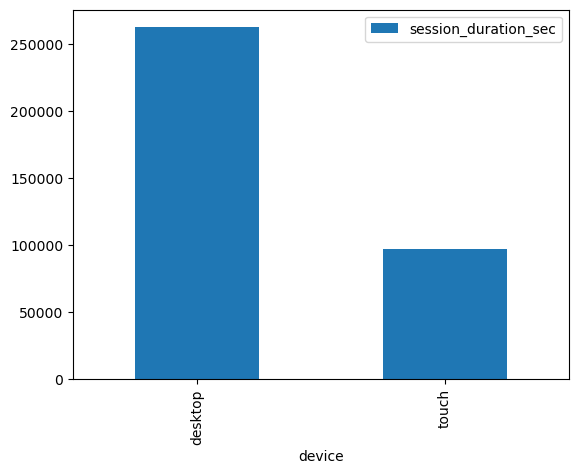

In [77]:
visits.groupby('device').count().plot(y='session_duration_sec', kind='bar')

A melhor origem para se investir é a 4 no desktop, pois recebe uma contagem de visitas maior sem ter um custo exorbitante como a plataforma 3.

# CAC CUSTO DE AQUISIÇÃO POR CLIENTE

In [78]:
# CUSTO AQUISIÇÃO DO CLIENTE
monthly_costs=costs.groupby('month')['costs'].sum().reset_index()
# Alterando tipo de dados
monthly_costs['month']=monthly_costs['month'].astype('datetime64[M]')
# Unindo as tabelas
cac_cohorts=pd.merge(ltv_cohorts, monthly_costs, left_on='order_month', right_on='month')

cac_cohorts['cac']=cac_cohorts['costs']/cac_cohorts['users_count']
cac_cohorts.head()

,buy_ts,first_order_month,revenue,uid,order_month,users_count,cohorte_revenue,ltv,months,month,costs,cac
0,2017-06-01 00:10:00,2017-06-01,17.00,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.0,6005.0
1,2017-06-01 00:25:00,2017-06-01,0.55,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.0,6005.0
2,2017-06-01 00:27:00,2017-06-01,0.37,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.0,6005.0
3,2017-06-01 00:29:00,2017-06-01,0.55,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.0,6005.0
4,2017-06-01 07:58:00,2017-06-01,0.37,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.0,6005.0


In [79]:
#INVESTIMENTOS AO LONGO DO TEMPO PARA CADA DISPOSITIVO
monthly_costs=monthly_costs.reset_index()
monthly_costs

,index,month,costs
0,0,2017-06-01,18015.00
1,1,2017-07-01,18240.59
2,2,2017-08-01,14790.54
3,3,2017-09-01,24368.91
4,4,2017-10-01,36322.88
5,5,2017-11-01,37907.88
6,6,2017-12-01,38315.35
7,7,2018-01-01,33518.52
8,8,2018-02-01,32723.03
9,9,2018-03-01,30415.27


In [80]:
print('O valor total de custos pago ao marketing é:', cac_cohorts['costs'].unique().sum())

O valor total de custos pago ao marketing é: 329131.62


In [81]:
#INVESTIMENTO POR ORIGEM
costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

<AxesSubplot:xlabel='index'>

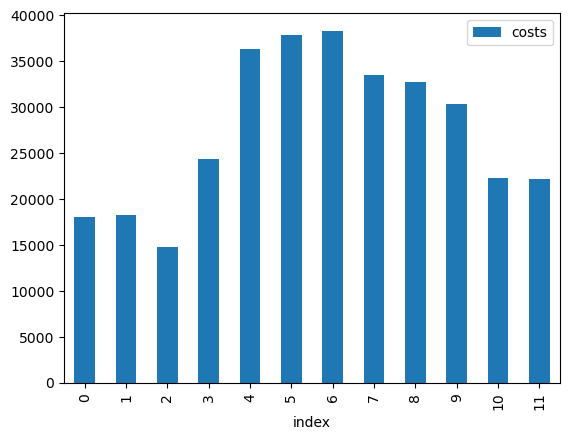

In [82]:
monthly_costs.plot(y='costs', x='index', kind='bar')

É perceptível que os gastos com marketing aumentam significativamente no mês 4,5,6.

# RETORNO SOBRE O INVESTIMENTO (ROI)

In [83]:
roi_cohorts=cac_cohorts
roi_cohorts['ROI']=(cac_cohorts['ltv']/cac_cohorts['cac'])*100

In [84]:
roi_cohorts

,buy_ts,first_order_month,revenue,uid,order_month,users_count,cohorte_revenue,ltv,months,month,costs,cac,ROI
0,2017-06-01 00:10:00,2017-06-01,17.00,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.00,6005.00000,53.052956
1,2017-06-01 00:25:00,2017-06-01,0.55,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.00,6005.00000,53.052956
2,2017-06-01 00:27:00,2017-06-01,0.37,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.00,6005.00000,53.052956
3,2017-06-01 00:29:00,2017-06-01,0.55,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.00,6005.00000,53.052956
4,2017-06-01 07:58:00,2017-06-01,0.37,1,2017-06-01,3,9557.49,3185.83,0,2017-06-01,18015.00,6005.00000,53.052956
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47263,2018-05-31 23:42:00,2018-05-01,0.92,1,2018-05-01,8,13925.76,1740.72,0,2018-05-01,22224.27,2778.03375,62.660146
47264,2018-05-31 23:43:00,2018-05-01,3.67,1,2018-05-01,8,13925.76,1740.72,0,2018-05-01,22224.27,2778.03375,62.660146
47265,2018-05-31 23:50:00,2018-05-01,10.44,2,2018-05-01,8,13925.76,1740.72,0,2018-05-01,22224.27,2778.03375,62.660146
47266,2018-05-31 23:54:00,2018-05-01,0.30,1,2018-05-01,8,13925.76,1740.72,0,2018-05-01,22224.27,2778.03375,62.660146


In [85]:
roi_cohorts.describe()

,revenue,uid,users_count,cohorte_revenue,ltv,months,costs,cac,ROI
count,47268.00000,47268.000000,47268.000000,47268.000000,47268.000000,47268.000000,47268.000000,47268.000000,47268.000000
mean,5.33244,1.066557,4.259097,13371.552518,3421.462850,0.664974,29983.806757,7889.713604,44.924652
std,22.57430,0.282291,1.833542,6940.905610,1969.973142,1.766696,7414.358369,2884.496911,20.190784
min,0.00000,1.000000,3.000000,211.480000,27.485000,0.000000,14790.540000,2778.033750,0.689649
25%,1.34000,1.000000,3.000000,9557.490000,2409.610000,0.000000,22289.380000,6005.000000,41.617291
50%,2.75000,1.000000,3.000000,14568.530000,3533.563333,0.000000,32723.030000,7603.817500,54.201488
75%,5.50000,1.000000,5.000000,20767.490000,4856.176667,0.000000,36322.880000,10138.423333,59.783265
max,2633.28000,8.000000,8.000000,21716.200000,6922.496667,11.000000,38315.350000,12771.783333,63.362260


<AxesSubplot:xlabel='month'>

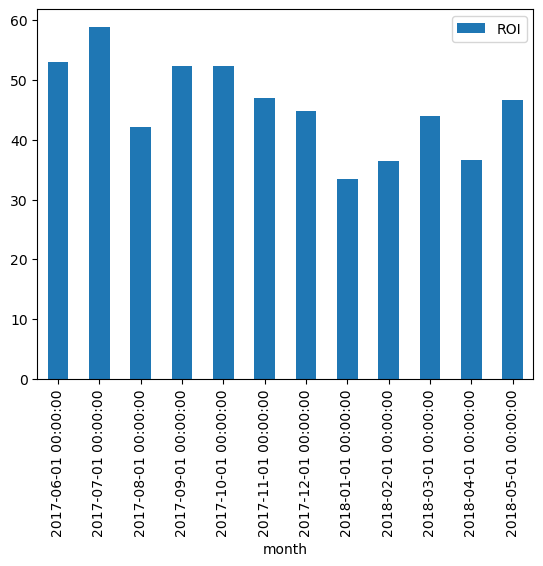

In [86]:
roi_cohorts.groupby(['month']).agg({'ROI':'mean'}).plot(kind='bar')

# CONCLUSÃO

## Produto

### Uso por tempo: 

- Utilizando a taxa de retenção:

    Essa métrica informa a fidelidade do público – com que frequência eles retornam ao aplicativo. A fórmula é simples: taxa de retenção = (usuários por dia/ usuários por semana) ou taxa de retenção = (usuários por dia/usuários por mês).
    Para a Y.alfafish a taxa de retenção semanal é 15%, e a mensal 3%.

### Pedidos por tempo:

- Quando os clientes começam a comprar?
    
    Provavelmente os clientes estudam os produtos em diferentes sites, e criam a conta na Y.alfafish apenas quando decidem comprar, pois a mediana de tempo para a primeira compra é 5 minutos, tempo suficiente para cadastras a forma de pagamento, e pensar um pouco antes de clicar em comprar.
    
### Volume:
    
- Volume das compras na Y.alfafish:

    O volume médio de compras na Y.alfafish é: 5.48057663455887 e não varia significativamente ao longo dos meses.
    
#### Receita por compra:
    
- Dinheiro por compra:

    O lucro bruto médio adquirido agrupado mensalmente é 3421.
    
## Marketing:

### Dinheiro gasto:
    
- Dinheiro gasto:

    O valor total de custos pago ao marketing é: 329131.62

    As origens com maior valor investido em marketing são: 3,4,5,2,1
    
    É perceptível que os gastos com marketing aumentam significativamente no mês 4,5,6.
    
### Retorno sobre investimento:

    O Maior retorno sobre investimento foi no segundo mês.
    
    Todos os ROI foram menor que 100, significando que estão tendo prejuízo para cada usuário no site.
    
#### Concluí-se que é necessário um ajuste nos métodos de marketing, para torná-los mais eficientes, ou mais baratos. Assim tornando o negócio da Y.Alfafish rentável.